In [66]:
import csv
import os
import pandas as pd

import csv

def read_measures():
    datos = []
    for i in range(1, 14):
        # Construimos el nombre del archivo
        archivo = f"mediciones/medicion{i}.csv"
        datos_archivo = []

        with open(archivo, 'r', newline='') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Omitir la primera fila

            for row in csvreader:
                datos_archivo.append(row)

        datos.append(datos_archivo)

    return datos

datos = read_measures()
#ver medición 6 (271.49)

#intercambio índice 1 y 3 en valor_m para que de coherente
valor_m = [221.3, 72.32 , 111.33, 22.13, 128.32, 271.49, 83.37, 83.37, 94.45,138.71, 138.71, 94.45, 83.37 ]
valor_M = [72.32, 72.32, 72.32, 72.32, 72.32, 72.32, 94.45, 72.32, 72.32, 72.32, 72.32, 72.32, 72.32]

#Se contaba con tres masas: una bola de madera de 5.83 gramos, una bola de plata de 22.13 gramos, y una bola de oro de 72.32 gramos.
#print(datos)
#print(len(datos))

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes los siguientes datos de tiempo y posición
# (sustituye esto por tus datos reales)
#tiempos = np.array([0, 1, 2, 3, 4, 5])  # Tiempo en segundos
#posiciones = np.array([0, 1, 4, 9, 16, 25])  # Posición en metros

def p_v_a(datos):
    # Iteramos sobre cada conjunto de datos
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0]) for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]

        # Aquí puedes llamar a tu función con los tiempos y posiciones
        # Por ejemplo:
        calcular_y_graficar(tiempos, posiciones, i)

def calcular_y_graficar(tiempos, posiciones, i, plot = False):
    # Calculamos las diferencias de tiempo y posición
    dt = np.diff(tiempos)
    dx = np.diff(posiciones)

    # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
    velocidades = dx / dt

    # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
    aceleraciones = np.diff(velocidades) / dt[:-1]
    if plot == True:
        # Ahora puedes graficar los resultados
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.title(f'Posición vs Tiempo (Archivo {i+1})')
        plt.plot(tiempos, posiciones, 'o-')
        #plt.title('Posición vs Tiempo')
        plt.xlabel('Tiempo (microsegundos)')
        plt.ylabel('Posición (cm)')

        plt.subplot(2, 2, 2)
        plt.plot(tiempos[1:], velocidades, 'o-')
        plt.title('Velocidad vs Tiempo')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Velocidad (cm/s)')

        plt.subplot(2, 2, 3)
        plt.plot(tiempos[1:-1], aceleraciones, 'o-')
        plt.title('Aceleración vs Tiempo')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Aceleración (cm/s^2)')

        plt.tight_layout()
        plt.show()

p_v_a(datos)

 acel = 5.199999999999998e-05 valor =  22.13


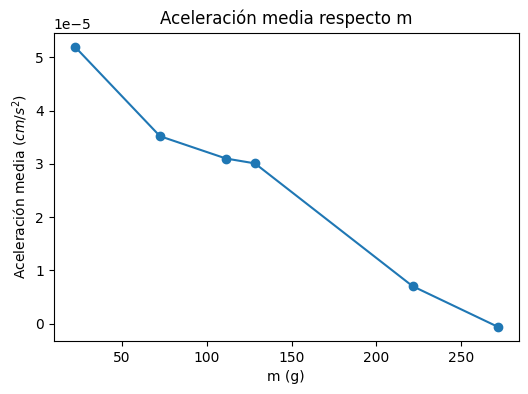

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_y_graficar(tiempos, posiciones, m, M, plot = False):
    # Calculamos las diferencias de tiempo y posición
    dt = np.diff(tiempos)
    dx = np.diff(posiciones)

    # Calculamos la velocidad como la razón de cambio de la posición respecto al tiempo
    velocidades = dx / dt

    # Calculamos la aceleración como la razón de cambio de la velocidad respecto al tiempo
    aceleraciones = np.diff(velocidades) / dt[:-1]
    if plot == True:
        # Ahora puedes graficar los resultados
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.title(f'Posición vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos, posiciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Posición (m)')

        plt.subplot(2, 2, 2)
        plt.title(f'Velocidad vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:], velocidades, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Velocidad (m/s)')

        plt.subplot(2, 2, 3)
        plt.title(f'Aceleración vs Tiempo (m={m}, M={M})')
        plt.plot(tiempos[1:-1], aceleraciones, 'o-')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Aceleración (m/s^2)')

        plt.tight_layout()
        plt.show()
    return np.mean(aceleraciones), np.mean(velocidades)

def acel_vs_masa(datos, valor_m, valor_M ):
    aceleraciones_medias =[]
   
    for i, datos_archivo in enumerate(datos):
        # Extraemos los tiempos y posiciones
        tiempos = [float(dato[0]) for dato in datos_archivo]
        posiciones = [float(dato[1]) for dato in datos_archivo]

        # Restamos el primer tiempo a todos los tiempos
        primer_tiempo = tiempos[0]
        tiempos = [t - primer_tiempo for t in tiempos]

        # Obtenemos las masas m y M para este conjunto de datos
        m, M = valor_m[i-1], valor_M[i-1]

        
        aceleracion_media, velocidades_media = calcular_y_graficar(tiempos, posiciones, m, M)
        if i == 3: print(f" acel = {aceleracion_media} valor =  {valor_m[i]}")
        aceleraciones_medias.append(aceleracion_media)
        if i == 5: break
    # Graficamos la aceleración media en función de m
    aceleraciones_medias, valor_m = zip(*sorted(zip(aceleraciones_medias, valor_m)))
    plt.figure(figsize=(6, 4))
    plt.plot(valor_m, aceleraciones_medias, 'o-')
    plt.title('Aceleración media respecto m')
    plt.xlabel('m (g)')
    plt.ylabel('Aceleración media ($cm/s^2$)')
    plt.show()
    return aceleraciones_medias

aceleracion_media = acel_vs_masa(datos, valor_m, valor_M )


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (6,).

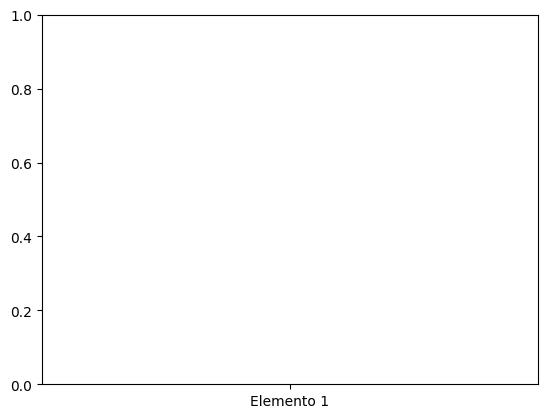

In [69]:
def estimar_coef_rozamiento(aceleracion_media, valor_m, valor_M, plot = False):
    coef_rozamientos = []  # Lista para almacenar los coeficientes de rozamiento
    for a, m in zip(aceleracion_media, valor_m):
        f_friccion = m * a  # F = m*a

        # Calculamos la fuerza normal (asumiendo que el objeto se mueve en un plano horizontal)
        f_normal = m * 9.8  # m*g

        # Calculamos el coeficiente de rozamiento
        coef_rozamiento = f_friccion / f_normal
        coef_rozamientos.append(coef_rozamiento)

    return coef_rozamientos

    import matplotlib.pyplot as plt

def graficar_coeficientes(coeficientes):
    plt.figure(figsize=(6, 4))
    plt.plot(coeficientes, 'o-')
    plt.title('Coeficiente de rozamiento')
    plt.xlabel('Número de medición')
    plt.ylabel('Coeficiente de rozamiento')
    plt.show()

    # Llamamos a la función para graficar los coeficientes de rozamiento
   

coef_rozamiento = estimar_coef_rozamiento(aceleracion_media, valor_m, valor_M, plot = False)
graficar_coeficientes(coef_rozamiento)